#Project Name - Hotel Booking Analysis


***Project Type** - EDA

***Contribution** - Team

***Team Member 1** - Aravind Dasarapu

***Team Member 2** - Pedagadi Prasanthi


For this EDA project, we will use the “Hotel booking demand” dataset.

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

**The first step is to import the main libraries that we will use for this project.**

#Import Libraries

In [7]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings

In [8]:
warnings.filterwarnings("ignore")

#DataSet Loading

**Now, we download the dataset to use it as a pandas dataframe.**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
Hotel_bookings = pd.read_csv(r'/content/drive/MyDrive/Hotel Booking EDA/Hotel Bookings.csv')

#Dataset View

In [11]:
Hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#DataSet Rows And Columns Count

In [12]:
Hotel_bookings.shape

(119390, 32)

**Now we know that our dataset has more than One-Lakh rows.**

#DataSet Information

In [13]:
Hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#Handling of Missing Values

**Now lets check how many cells are missing from our dataset.**

In [14]:
Hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**We can see that we have 4 columns with missing values.**

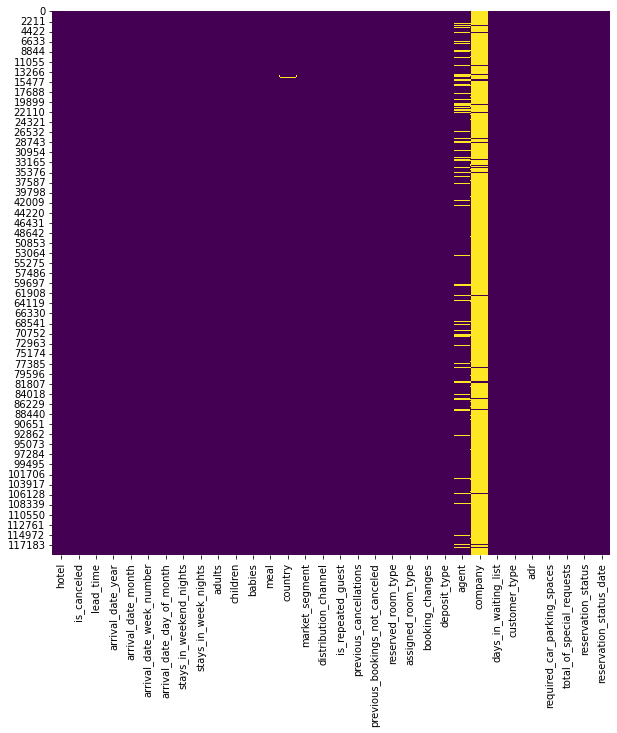

In [15]:
#Checking the null values by plotting Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Hotel_bookings.isnull(),cbar=False,cmap='viridis')


The columns “agent” and “company” have a high number of missing values. As these columns won’t be relevant for our analysis, we can delete them.The columns “children” and “country” have a low number of missing values.We will remove the full row on missing cells.Now we will drop the days_in_waiting_list column because we won’t use it for this analysis

In [16]:
Hotel_bookings.shape

(119390, 32)

In [17]:
#Removing the missing values
Hotel_bookings = Hotel_bookings.drop(labels='days_in_waiting_list', axis=1) # We delete days_in_waiting_list column
Hotel_bookings = Hotel_bookings.drop(['company','agent'],axis=1)# We delete agent and company columns
Hotel_bookings = Hotel_bookings.dropna(axis=0)


**Lets check again the missing values.**

In [18]:
Hotel_bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

**Perfect! now we don’t have any missing value.**

#Understanding The Variables

In [19]:
Hotel_bookings.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,118898,118898.000000,118898.000000,118898.000000,118898,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,...,118898,118898,118898.000000,118898,118898,118898.000000,118898.000000,118898.000000,118898,118898
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,10,12,NaN,3,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,A,A,NaN,No Deposit,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79302,NaN,NaN,NaN,13852,NaN,NaN,NaN,NaN,NaN,...,85601,73863,NaN,104163,89174,NaN,NaN,NaN,74745,1461
mean,NaN,0.371352,104.311435,2016.157656,NaN,27.166555,15.800880,0.928897,2.502145,1.858391,...,NaN,NaN,0.221181,NaN,NaN,102.003243,0.061885,0.571683,NaN,NaN
std,NaN,0.483168,106.903309,0.707459,NaN,13.589971,8.780324,0.996216,1.900168,0.578576,...,NaN,NaN,0.652785,NaN,NaN,50.485862,0.244172,0.792678,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,NaN,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,NaN,0.000000,NaN,NaN,70.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,NaN,0.000000,NaN,NaN,95.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,161.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,NaN,0.000000,NaN,NaN,126.000000,0.000000,1.000000,NaN,NaN


#Variables Description




* **hotel**- type of hotel
* **is_cancelled** - If the booking was cancelled(1) or not(0)
* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* **arrival_date_year** - Year of arrival date
* **arrival_date_month**- Month of arrival date
* **arrival_date_week_number** - Week number for arrival date
* **arrival_date_day**- Day of arrival date
* **stays_in_weekend_nights**- Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **adults** - Number of adults
* **children** - Number of children
* **babies** - Number of babies
* **meal**- Kind of meal opted for
* **country** - country of origin(code)
* **market segment** - Which segment the customer belongs to
* **distribution chanel**- How the customer accessed the stay- corporate booking/Direct/TA.TO
* **is_repeated_guest** - Guest coming for first time or not
* **previous_cancellation** - Was there a cancellation before
* **previous_bookings** - Count of previous bookings
* **reserved_room_type** - Type of room reserved
* **assigned_room_type** - Type of room assigned
* **booking_changes** - Count of changes made to booking
* **deposit_type** - Deposit type
* **agent** - Booked through agent
* **days_in_waiting_list** - Number of days in waiting list
* **customer_type** - Type of customer
* **required_car_parking** - If car parking is required
* **total_of_special_req** - Number of additional special requirements
* **reservation_status** - Status of reservation
* **reservation_date** - Date of reservation

In [20]:
Hotel_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,No Deposit,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,No Deposit,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,No Deposit,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,No Deposit,Transient,104.40,0,0,Check-Out,2017-09-07


**Here we can see some outliers.**

**Letsbuild boxplots to see it better**.




In [21]:
columns = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces']

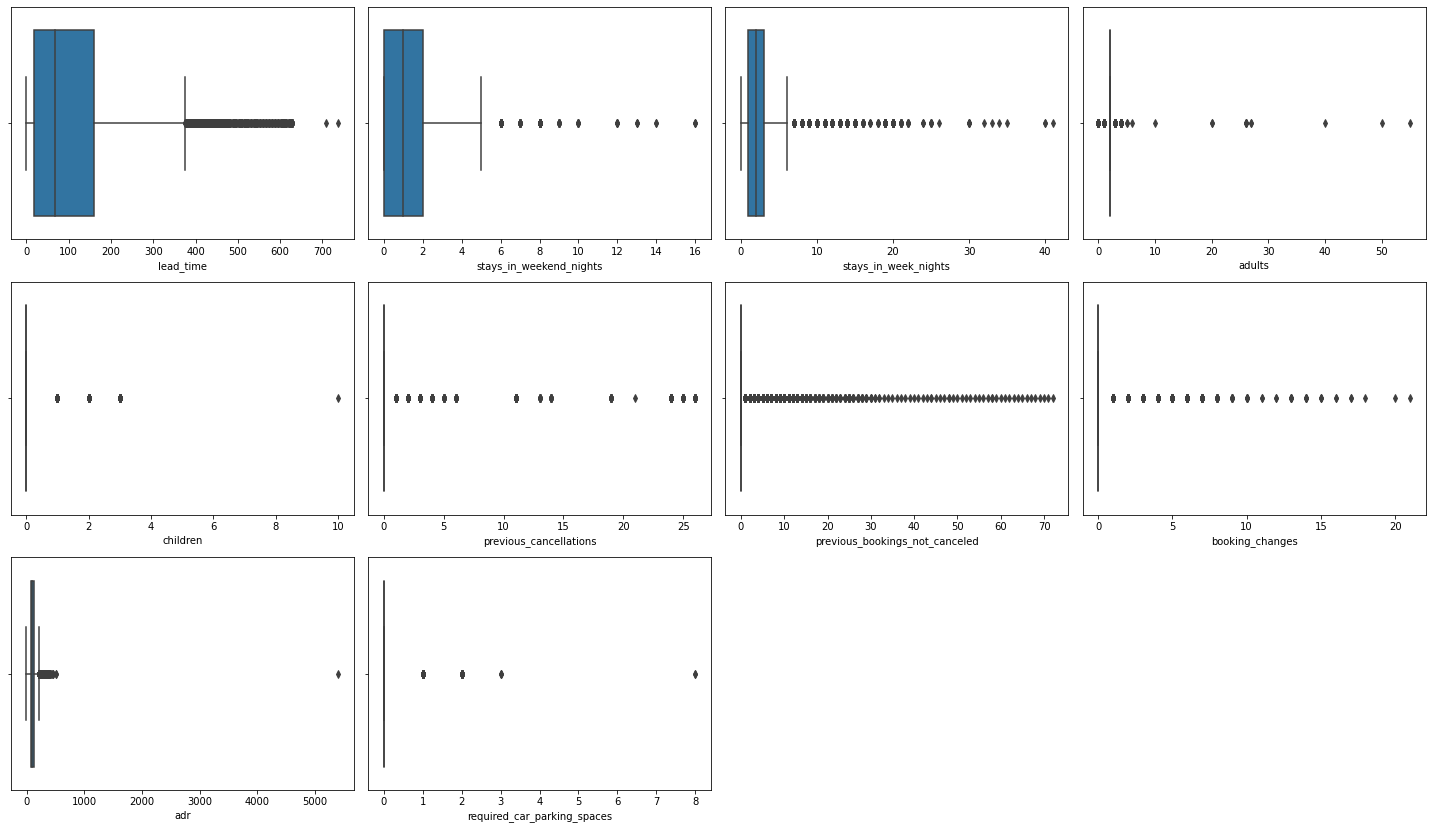

In [22]:
plt.figure(figsize=(20,15))
n=1
for column in columns:
  plt.subplot(4,4,n)
  n+=1
  sns.boxplot(Hotel_bookings[column])
  plt.tight_layout()

# Outlier Handling


**We handled the outliers by using conditionals to clean the data.**

In [23]:
Hotel_bookings.loc[Hotel_bookings['lead_time']>500,'lead_time'] = 500
Hotel_bookings.loc[Hotel_bookings['stays_in_weekend_nights']>=5,'stays_in_weekend_nights'] = 5
Hotel_bookings.loc[Hotel_bookings['stays_in_week_nights']>10,'stays_in_week_nights'] = 10
Hotel_bookings.loc[Hotel_bookings['adults']>4,'adults'] = 4
Hotel_bookings.loc[Hotel_bookings['children']>8,'children'] = 0
Hotel_bookings.loc[Hotel_bookings['previous_cancellations']>0,'previous_cancellations'] = 1
Hotel_bookings.loc[Hotel_bookings['previous_bookings_not_canceled']>0,'previous_bookings_not_canceled'] = 1
Hotel_bookings.loc[Hotel_bookings['booking_changes']>5,'booking_changes'] = 5
Hotel_bookings.loc[Hotel_bookings['adr']>1000,'adr'] = 1000
Hotel_bookings.loc[Hotel_bookings['required_car_parking_spaces']>5,'required_car_parking_spaces'] = 0
Hotel_bookings.loc[Hotel_bookings.babies > 8, 'babies'] = 0



#Data Wrangling

In [24]:
# Check Unique Values for each variable.
for i in Hotel_bookings.columns.tolist():
  print("No. of unique values in ",i,"is",Hotel_bookings[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 451 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 6 .
No. of unique values in  stays_in_week_nights is 11 .
No. of unique values in  adults is 5 .
No. of unique values in  children is 4 .
No. of unique values in  babies is 3 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 7 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 2 .
No. of unique values in  previous_bookings_not_canceled is 2 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in  as

**Newly added Columns**

* **total_people**  - total number of guests
* **price** - price for respective guests 
* **adr_per_person** - average daily rate per person 
* **arrival_date** - arrival date of guests 

In [25]:
Hotel_bookings['total_people'] = Hotel_bookings['adults'] + Hotel_bookings['children']
Hotel_bookings['price'] = Hotel_bookings['adr']*( Hotel_bookings['stays_in_week_nights']+Hotel_bookings['stays_in_weekend_nights'])
Hotel_bookings['adr_per_person'] = Hotel_bookings['adr']/Hotel_bookings['total_people']
Hotel_bookings['arrival_date_year'] = Hotel_bookings['arrival_date_year'].astype('str')
Hotel_bookings['arrival_date_day_of_month'] = Hotel_bookings['arrival_date_day_of_month'].astype('str')
Hotel_bookings['arrival_date'] = Hotel_bookings['arrival_date_year']+'-'+Hotel_bookings['arrival_date_month']+'-'+Hotel_bookings['arrival_date_day_of_month']
Hotel_bookings['arrival_date'] = pd.to_datetime(Hotel_bookings['arrival_date'],errors = 'coerce')

#Exploratory Analysis and Visualization

**In this section, we will visualize the data to get insights about it.**

# A)Month

**Now lets check overall monthly wise bookings.**

In [26]:
#creating a copy of dataset and assigning to df
df = Hotel_bookings.copy()
df.arrival_date_month.value_counts()#total monthly wise bookings

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

In [27]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'total_people', 'price', 'adr_per_person',
       'arrival_date'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

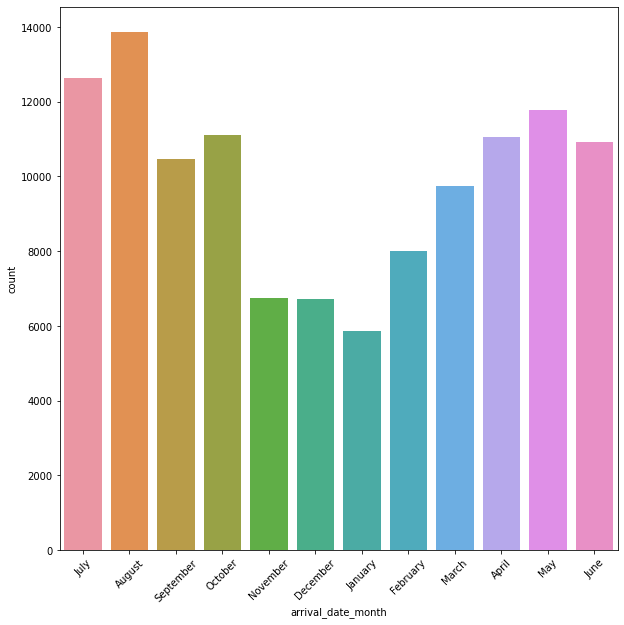

In [28]:
plt.figure(figsize=(10,10))#total bookings wrt months
sns.countplot(df['arrival_date_month'])
plt.xticks(rotation=45)

In [29]:
df['arrival_date_month'].value_counts()

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

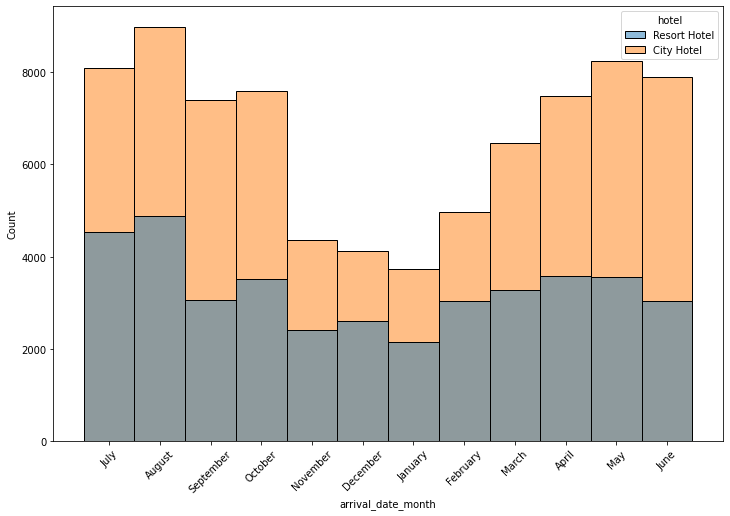

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x = df['arrival_date_month'], hue='hotel')
plt.xticks(rotation = '45')

**From the above analysis we can say that most bookings are made in August month followed by July,May and October.**


**From the above analysis we can say that more bookings are made for city hotels.**

# B)Confirmed Bookings

**Lets see how many confirmed bookings per month there are**

In [31]:
confirmed_bookings = df[df['is_canceled']==0]
confirmed_bookings['arrival_date_month'] = df['arrival_date'].dt.month
confirmed_bookings['arrival_date_month'].value_counts().sort_index()

1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: arrival_date_month, dtype: int64

**The confirmed bookings goes from their lower value (4068) in january to their highest value (8618) in august.**

# C)Cancelled bookings

**Now lets check the cancelled bookings.**

In [32]:
canceled_bookings = df[df['is_canceled']==1]
(len(canceled_bookings)/len(df))*100  #percentage of cancellations wrt overall bookings

37.13519150868812

**Out of total bookings we have a 37.13% of cancelations.**

Text(0, 0.5, 'Cancellations')

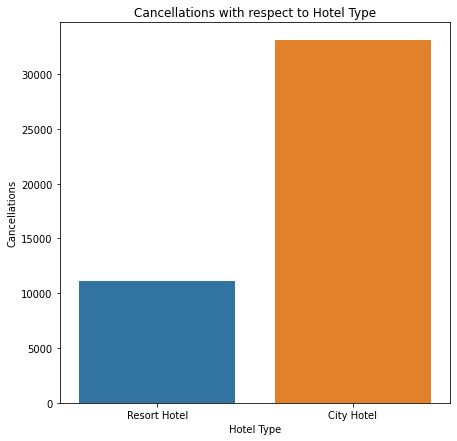

In [33]:
#plotting the bar graph to show which type of hotel has more prone to cancellations
plt.figure(figsize=(7,7))
sns.countplot(canceled_bookings['hotel'])
plt.title('Cancellations with respect to Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellations') 

**From above we can say that city hotels are more prone to cancellations**

#D)Year

**Year of arrival date**

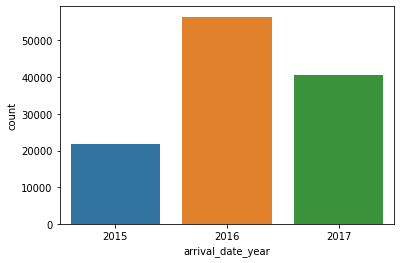

In [34]:
sns.countplot(df['arrival_date_year'])

**From the above figure we can say that in the year 2016 more bookings are made.**

# E)Country

**Here we will check the country of origin**

In [35]:
countries_wrt_bookings = df.groupby(['country'])['is_canceled'].count()
countries_wrt_bookings.sort_values(inplace = True,ascending=False)

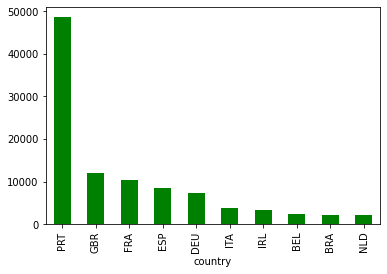

In [36]:
top_ten_countries_of_customers = countries_wrt_bookings[:10]
top_ten_countries_of_customers.plot(kind = 'bar',color ='g')

In [37]:
x_values = countries_wrt_bookings.index[:10]
list(x_values)

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

**From the above figure we can say that people from the Portugal country booking more tickets followed by Great Britain,France etc.**

#F)customer type bookings

**Type of booking, assuming one of four categories:**

a)Contract — when the booking has an allotment or other type of contract associated to it.

b)Group — when the booking is associated to a group

c)Transient — when the booking is not part of a group or contract, and is not associated to other transient booking

d)Transient-party — when the booking is transient, but is associated to at least other transient booking

In [38]:
#checking what type of customers has more bookings
df.customer_type.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

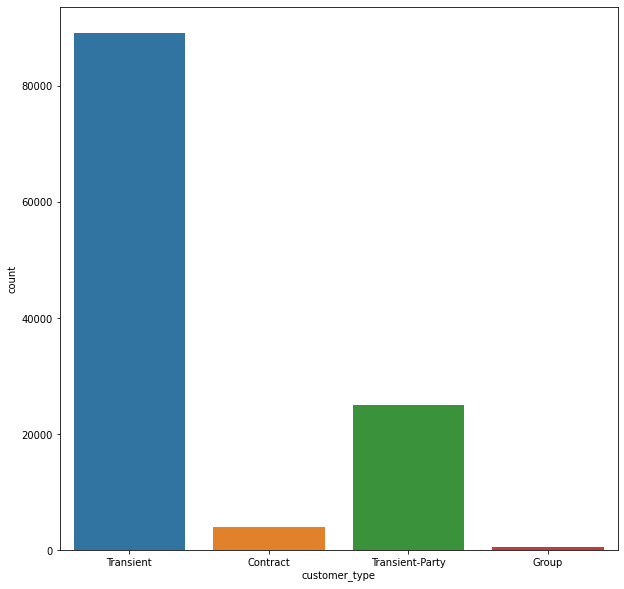

In [39]:
plt.figure(figsize = (10,10))
sns.countplot(df['customer_type']);

**From the Figure we can depict that Transient bookings are more compartively from other type of bookings**

#G)Meal

**Type of meal booked. Categories are presented in standard hospitality meal packages:**

a)Undefined/SC — no meal package

b)BB — Bed & Breakfast

c)HB — Half board (breakfast and one other meal — usually dinner)

d)FB — Full board (breakfast, lunch and dinner)

In [40]:
df.meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

In [41]:
labels = [i for i in df['meal'].unique()]
preferred_meal_wrt_customer = df.groupby(['meal']).count()
preferred_meal_wrt_customer = pd.DataFrame(preferred_meal_wrt_customer,index=labels)

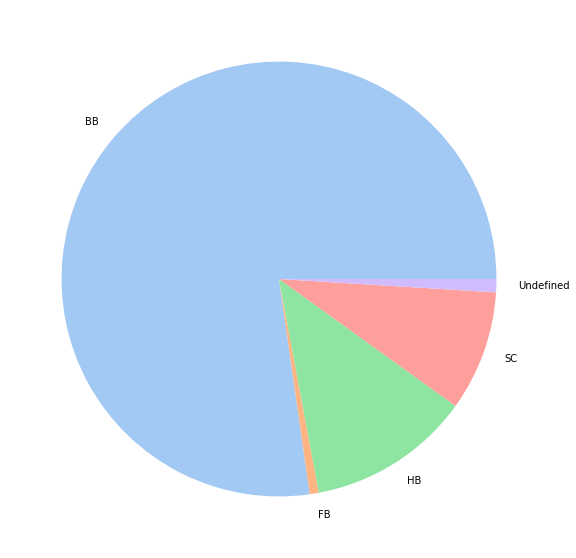

In [42]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel')[0:5]
plt.pie(preferred_meal_wrt_customer['hotel'],colors=colors,labels=labels)
plt.show()

**From the above analysis we can say that most people are preffering meal package mostly for Bed&Breakfast.**

#H)Market segment

**Lets check the Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”**

In [43]:
#checking the market segment through which more bookings are done
df.market_segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

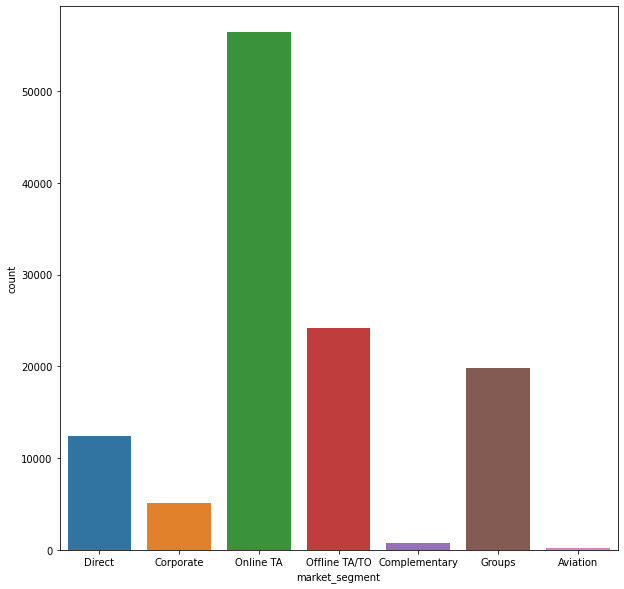

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(df['market_segment'])

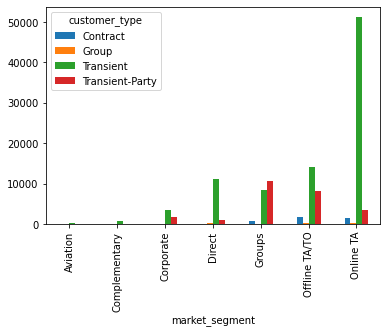

In [45]:
customers_wrt_market_type = df.groupby(['market_segment','customer_type'])['is_canceled'].count().unstack()
customers_wrt_market_type.plot(kind = 'bar');

**From the above analysis we can say that more bookings are made through "Online Travel Agents".**

#I)Reserved room type

In [46]:
df['reserved_room_type'].value_counts(normalize=True)

A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: reserved_room_type, dtype: float64

Text(0, 0.5, 'Bookings')

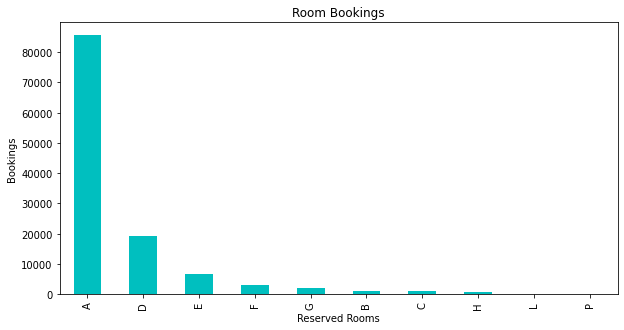

In [47]:
#checking and plotting the what type of room is reserved
plt.figure(figsize=(10,5))
preferred_room_type = df['reserved_room_type'].value_counts()
preferred_room_type.plot(kind='bar',color = 'c')
plt.title('Room Bookings')
plt.xlabel('Reserved Rooms')
plt.ylabel('Bookings')



**From the above figure we can say that people are preferring Room Type 'A' than other rooms**

#J)Assigned Room Type

**Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request**

In [48]:
#checking and plotting the what type of room is assigned
df.assigned_room_type.value_counts(normalize=True)

A    0.621230
D    0.211660
E    0.065081
F    0.031388
G    0.021354
C    0.019798
B    0.018158
H    0.005955
I    0.003003
K    0.002347
P    0.000017
L    0.000008
Name: assigned_room_type, dtype: float64

Text(0, 0.5, 'Bookings')

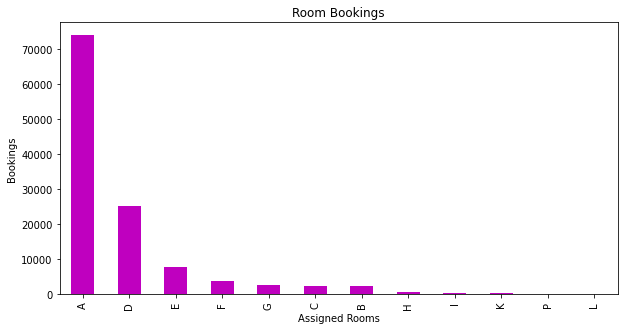

In [49]:
plt.figure(figsize=(10,5))
preferred_room_type = df['assigned_room_type'].value_counts()
preferred_room_type.plot(kind='bar',color = 'm')
plt.title('Room Bookings')
plt.xlabel('Assigned Rooms')
plt.ylabel('Bookings')


#K)Deposit Type

**Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:**

No Deposit — no deposit was made

Non Refund — a deposit was made in the value of the total stay cost

Refundable — a deposit was made with a value under the total cost of stay




In [50]:
#checking and plotting the deposit type
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876070
Non Refund    0.122567
Refundable    0.001363
Name: deposit_type, dtype: float64

Text(0, 0.5, 'Bookings')

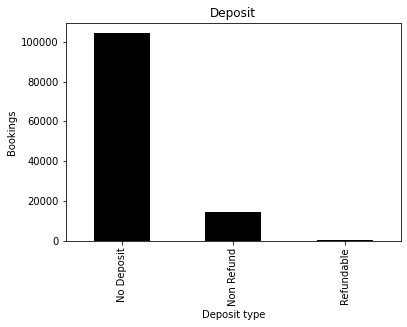

In [51]:
deposit_type_wrt_bookings = df['deposit_type'].value_counts()
deposit_type_wrt_bookings.plot(kind='bar',color = 'k')
plt.title('Deposit')
plt.xlabel('Deposit type')
plt.ylabel('Bookings')


**More people are booking hotels without any deposit.**

#L)Booking changes

**Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation**

In [52]:
#finding the changing in bookings and plotting
df.booking_changes.value_counts(normalize=True)

0    0.848643
1    0.106301
2    0.031876
3    0.007780
4    0.003154
5    0.002246
Name: booking_changes, dtype: float64

Text(0, 0.5, 'booking_changes')

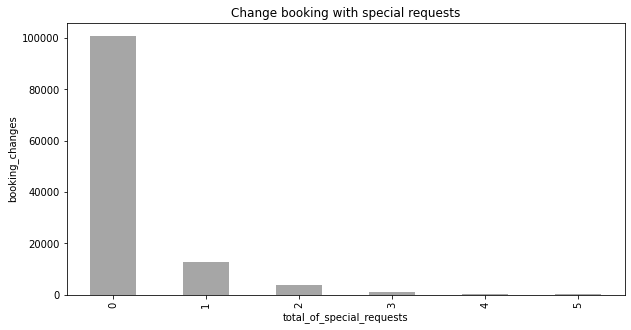

In [53]:
plt.figure(figsize=(10,5))
bookings_changed = df['booking_changes'].value_counts()
bookings_changed.plot(kind='bar',color='0.65')
plt.title('Change booking with special requests')
plt.xlabel('total_of_special_requests')
plt.ylabel('booking_changes')



**Majority of guests doesnot prefer any special requests.**

#M) Distribution Channel

**Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”**

In [54]:
df.distribution_channel.value_counts(normalize=True)

TA/TO        0.821965
Direct       0.121810
Corporate    0.054593
GDS          0.001623
Undefined    0.000008
Name: distribution_channel, dtype: float64

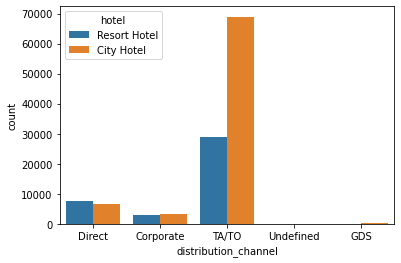

In [56]:
sns.countplot(data=df,x='distribution_channel',hue='hotel')

**More bookings are made through "Travel Agents" and "Tour Operators" on Online**

#N)Required Car Parking spaces

**Number of car parking spaces required by the customer.**

In [57]:
#finding and plotting required car parking spaces
df.required_car_parking_spaces.value_counts(normalize=True)

0    0.938536
1    0.061204
2    0.000235
3    0.000025
Name: required_car_parking_spaces, dtype: float64

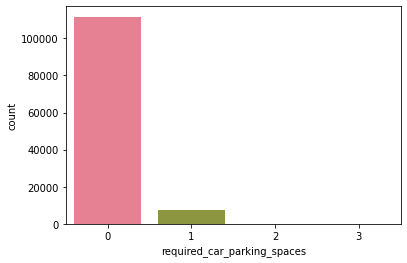

In [58]:
sns.countplot(df['required_car_parking_spaces'],palette = 'husl')

**Most people do not require any car parking spaces**

#O) Repeated Guests

**Check if the booking name was from a repeated guest (1) or not (0)**

In [59]:
#finding andd plotting the repeated guests
df.is_repeated_guest.value_counts(normalize=True)


0    0.967989
1    0.032011
Name: is_repeated_guest, dtype: float64

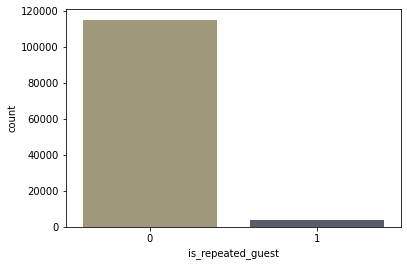

In [60]:
sns.countplot(df['is_repeated_guest'],palette = 'cividis_r')

**From the above figure we can say that people are not likely to visit the previously visited hotel.**

#P) Reservation Status

**Reservation last status, assuming one of three categories:**

a)Canceled — booking was canceled by the customer

b)Check-Out — customer has checked in but already departed

c)No-Show — customer did not check-in and did inform the hotel of the reason why

In [61]:
#finding and plotting the reservation status of people
df.reservation_status.value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: reservation_status, dtype: float64

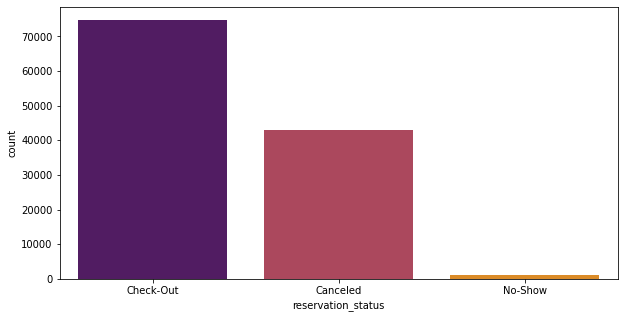

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(df['reservation_status'],palette = 'inferno')

**This shows that people are canceling bookings**

#Q) Hotel Type

**Lets see the proportion of reservations between hotel types.**

In [63]:
#finding and plotting the bookings based on hotel type
df.hotel.value_counts(normalize=True)

City Hotel      0.666975
Resort Hotel    0.333025
Name: hotel, dtype: float64

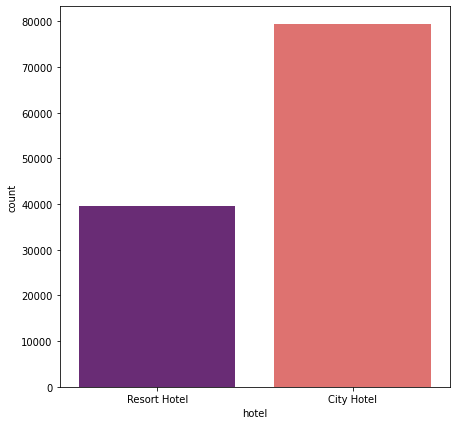

In [64]:
plt.figure(figsize=(7,7))
sns.countplot(df['hotel'],palette = 'magma')

**From the above figure we can say that people are booking City Hotels than Resort Hotels.**

**Bookings of customer type with respect of Hotels**

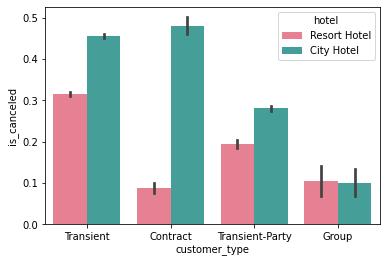

In [65]:
sns.barplot(data = df,x = 'customer_type', y = 'is_canceled', hue = 'hotel' ,palette = 'husl')

**we can say the most guests are staying in city hotels compared to resort hotels, but guests of group type is a little more in resort hotel than city hotels**

#R) Relationship between Month and Prices

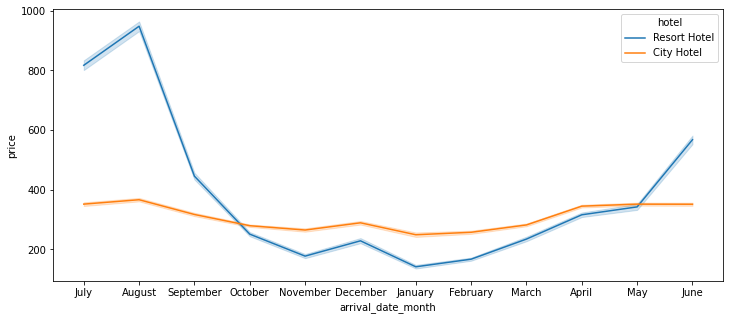

In [66]:
plt.figure(figsize = (12,5))
monthly_prices = df.groupby(['arrival_date_month','price'])['price'].count().unstack()
sns.lineplot(data = df,x='arrival_date_month',y='price',hue='hotel')
plt.show()

**From the above figure we can say that price is high in august,july and june for resort hotels.Whereas, for city hotels price is that fluctuated during months.**

In [67]:
months = [i for i in df['arrival_date_month'].unique()]

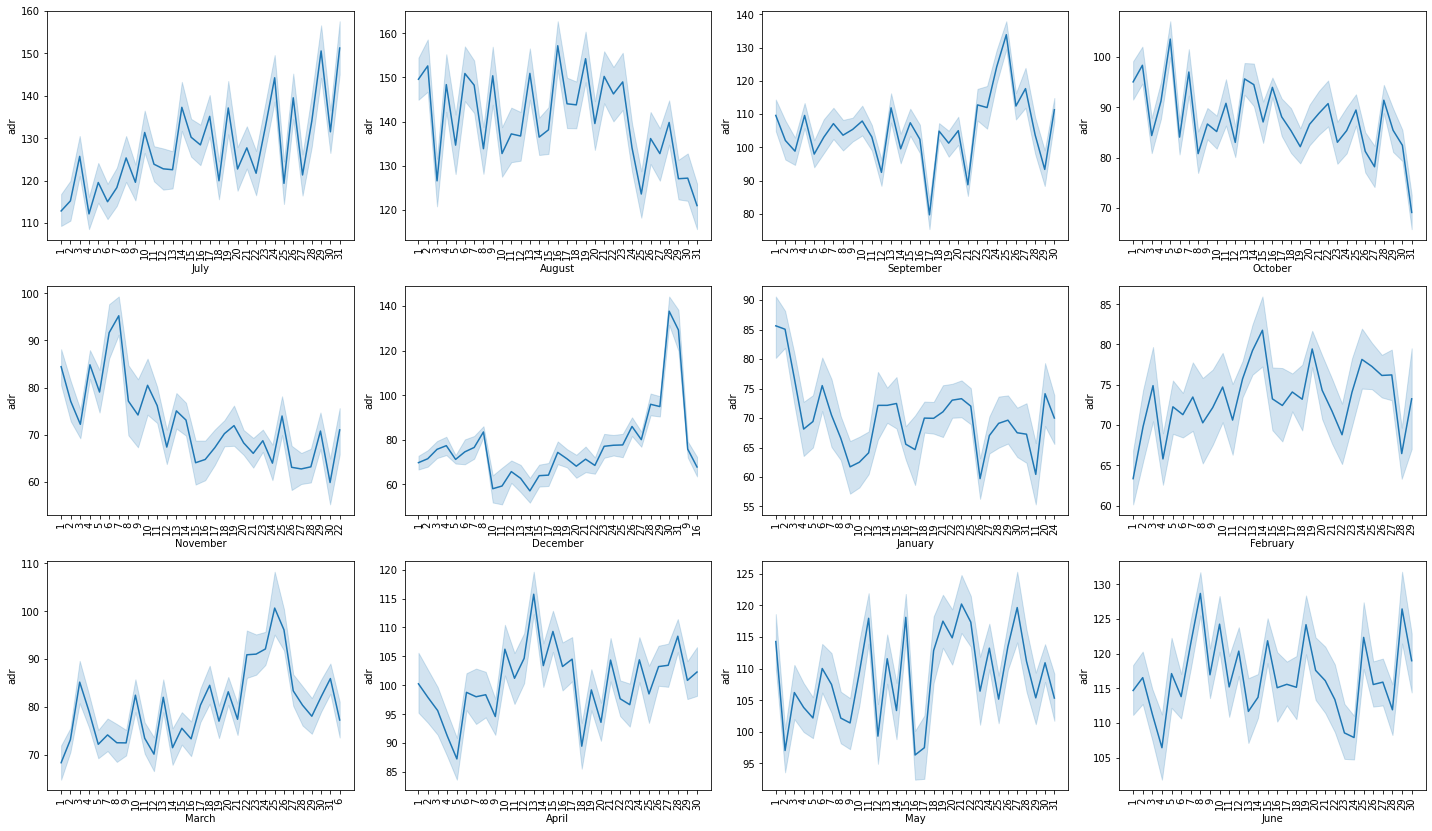

In [68]:
plt.figure(figsize = (20,15))
n = 1
for month in months:
  plt.subplot(4,4,n)
  n+=1
  sns.lineplot(data =df[df['arrival_date_month']==month] ,x='arrival_date_day_of_month',y='adr')
  plt.xlabel(month)
  plt.xticks(rotation = '90')
  plt.tight_layout()


**From above figure we can say that Price fluctuations are more in December**

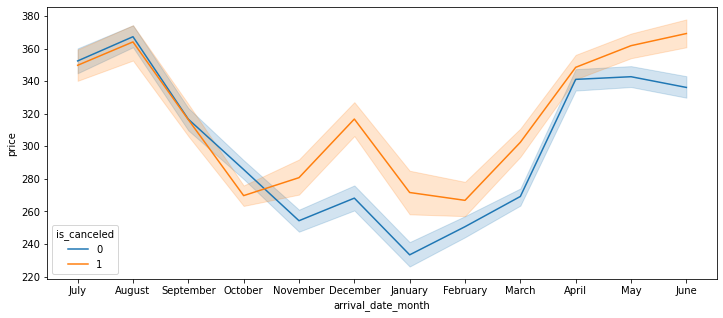

In [70]:
#finding and plotting city hotel monthly price fluctuations
city_hotel_monthly_prices = df[df['hotel']=='City Hotel']
plt.figure(figsize = (12,5))
sns.lineplot(data = city_hotel_monthly_prices , x='arrival_date_month',y='price',hue='is_canceled')
plt.show()

**Here we can say that guests in city hotels are more prone to cancelations from November to june when price is higher.**

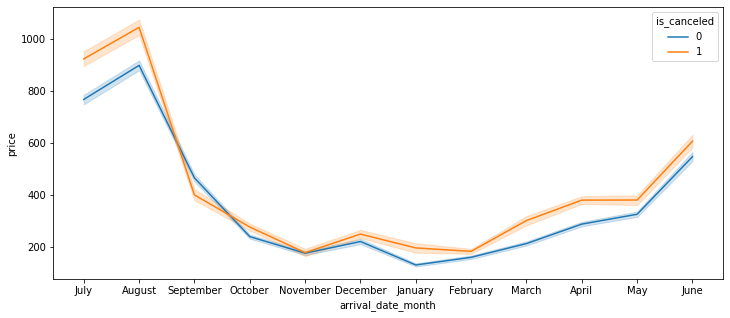

In [71]:
#finding and plotting resort hotel monthly price fluctuations
resort_hotel_monthly_prices = df[df['hotel']=='Resort Hotel']
plt.figure(figsize = (12,5))
sns.lineplot(data = resort_hotel_monthly_prices , x='arrival_date_month',y='price',hue='is_canceled')
plt.show()

**Here we can say that cancelations in resort hotel follow similar trend with respect to price**

#R)Average Daily Rate (ADR)

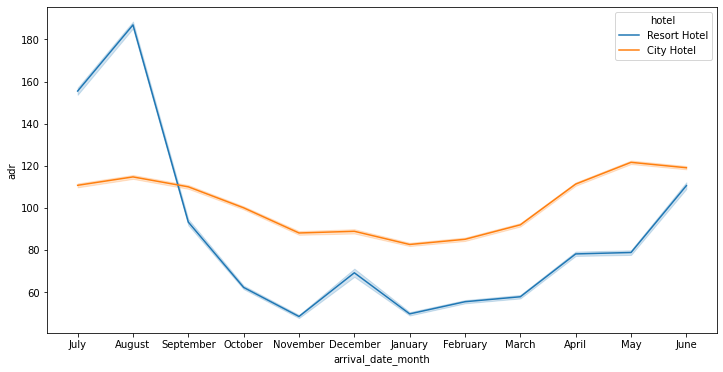

In [72]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

**For city hotels, the average daily rate is more expensive from september to june compared to resort hotels**

**For resort hotels, the average daily rate is more expensive during august, july.**

In [73]:
df_16 = df[df['arrival_date_year']=='2016']
df_15 = df[df['arrival_date_year']=='2015']
df_17 = df[df['arrival_date']=='2017']

**ADR throughout 2016**

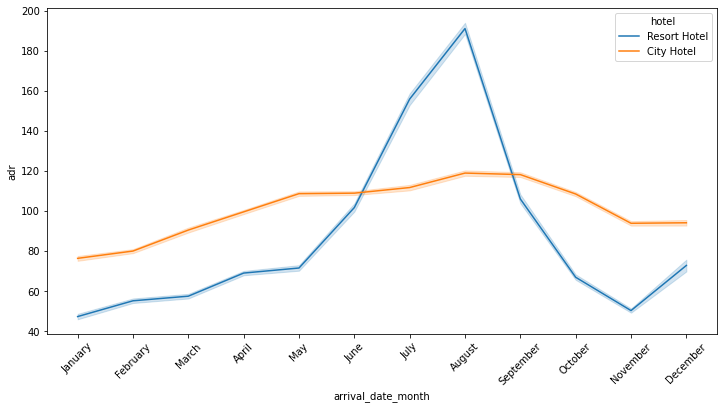

In [74]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df_16)
plt.xticks(rotation = '45')
plt.show()

**From the above figure we can say that in 2016 the ADR of resort hotel in more in the month of august.And for city hotels ADR is high from may to september.**

**ADR throughout 2015**

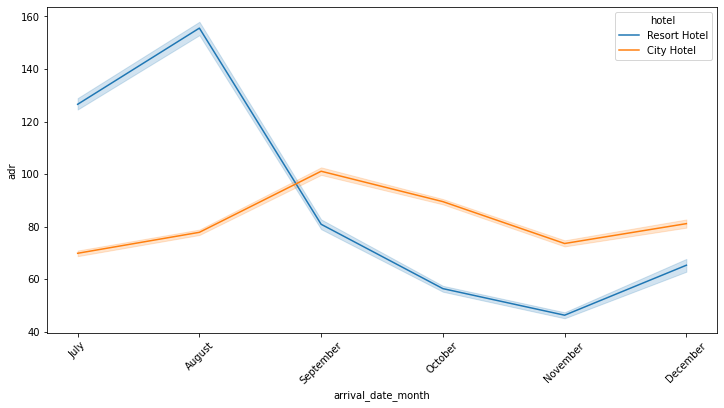

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df_15)
plt.xticks(rotation = '45')
plt.show()

**For resort hotels, the average daily rate is more expensive during august, july.For city hotels, the average daily rate is more expensive in september.**

# Inferences

**Now we will ask and answer some interesting insights about the data.**

**A)Most common and uncommon countries of origin**

In [76]:
print('Most common countries:')
print(df.country.value_counts().head(3))
print('-'*50)
print('\n Most uncommon countries:')
print(df.country.value_counts().tail(35))

Most common countries:
PRT    48586
GBR    12129
FRA    10415
Name: country, dtype: int64
--------------------------------------------------

 Most uncommon countries:
TGO    2
UGA    2
KNA    2
RWA    2
SYC    2
KIR    1
SDN    1
NCL    1
AIA    1
ASM    1
FJI    1
ATF    1
LCA    1
GUY    1
PYF    1
DMA    1
SLE    1
MRT    1
NIC    1
BDI    1
PLW    1
MLI    1
CYM    1
BFA    1
MDG    1
MMR    1
NPL    1
BHS    1
UMI    1
SMR    1
DJI    1
BWA    1
HND    1
VGB    1
NAM    1
Name: country, dtype: int64


**As we can see, Portugal tops the list with 48,586 of the cases, followed by Great Britain with 12,129 and France with 10,415.**

**There are 30 countries that can be considered as the most uncommon country of origin, with 1 guest per country. Among these, we have Madagascar, Dominica, Mali, Guyana, Palau, Kiribati, Sudan, etc.**

**B)Months of highest and least occupation**

In [77]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

**The month of highest occupation is august with 11.65% of the reservations. The month of lest occupation is january with 4.94% of the reservations.**

**C)Most popular meal package** 

In [78]:
df.meal.value_counts(normalize =True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

**The Bed & Breakfast option is the most popular, with a frequency of 77.26%.**

**D)people have been registered in the hotel**

In [79]:
df.total_people.sum()

233008.0

**233008 people have been registered in the hotel.**

**E)most common customer type**

In [80]:
df.customer_type.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

**Transients are the most common customer type, they represent 75% of the total customers.**

**F)car parking spaces used** 

In [81]:
df.required_car_parking_spaces.sum()

7342

In [82]:
confirmed_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,price,adr_per_person,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0.0,0.0,2015-07-01
1,Resort Hotel,0,500,2015,7,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0.0,0.0,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,75.0,75.0,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,75.0,75.0,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,196.0,49.0,2015-07-01


**7,342 car parking spaces have been used.**

In [83]:
stays_in_weekdays = confirmed_bookings[(confirmed_bookings['stays_in_week_nights']!=0) & (confirmed_bookings['stays_in_weekend_nights']==0)]
stays_in_weekenddays = confirmed_bookings[(confirmed_bookings['stays_in_weekend_nights']!=0) & (confirmed_bookings['stays_in_week_nights']==0)]
print("Percentage of guests staying only in weekend days :",(len(stays_in_weekenddays)/((len(stays_in_weekdays))+len(stays_in_weekenddays)))*100)
print("Percentage of guests staying only in week days :",(len(stays_in_weekdays)/((len(stays_in_weekdays))+len(stays_in_weekenddays)))*100)

Percentage of guests staying only in weekend days : 13.72463213172146
Percentage of guests staying only in week days : 86.27536786827854


**From above we can say that more guests stays at hotels in week days** 

In [84]:
canceled = df[df['is_canceled']==1]
cancellations_wrt_week_number = canceled['arrival_date_week_number'].value_counts()
cancellations_wrt_week_number.sort_values(ascending=False,inplace = True)
id_max = cancellations_wrt_week_number.idxmax()
max_cancel = cancellations_wrt_week_number.max()
id_min = cancellations_wrt_week_number.idxmin()
min_cancel = cancellations_wrt_week_number.min()
print("Week number:",id_max,"has maximum number of cancellations","count is:",max_cancel)
print("Week number:",id_min,"has minimun number of cancellations","count is:",min_cancel)

Week number: 33 has maximum number of cancellations count is: 1504
Week number: 51 has minimun number of cancellations count is: 246


**We can say that week 33 which is in August has most number of cancellations and week 51 which is in December has least number of cancellations**

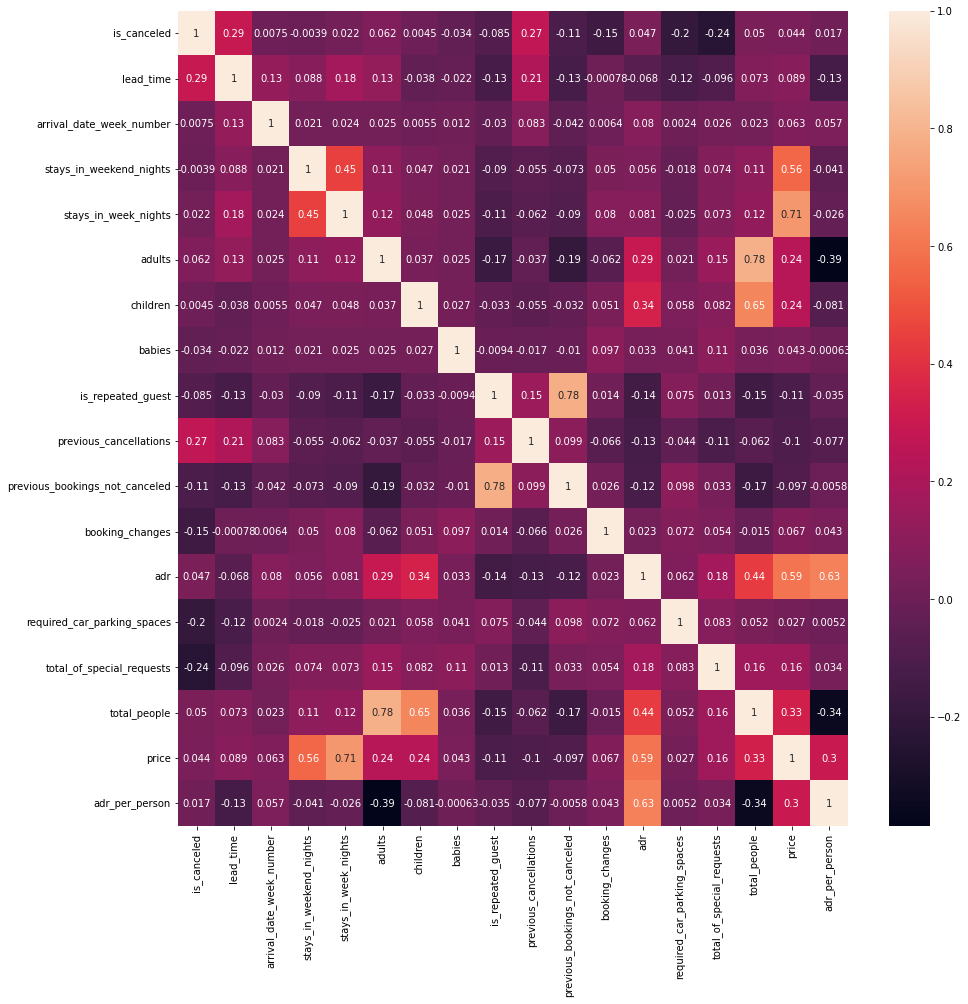

In [85]:
#correlation_heatmap

plt.figure(figsize=(15,15))
sns.heatmap(Hotel_bookings.corr(),cbar=True,annot=True)

# Conclusions



***   The majority of guests come from western europe countries.**

***   The majority of reservations are for city hotels.**


***   The number of repeated guests is too low.**

***   The majority of reservations converts into successful transactions.**


***   The many bookings are made in 2016 compared to 2015 and 2017.**

***   The majority of Bookings are made through Online Travel Agents.**



